In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Point
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

GROUP ONE QUESTIONS:

1) Make a map of power plants in the US, color coded by type
2) Make a map of air quality stations, color coded by average air quality
3) Make a map of air quality stations, color coded by worst air quality ever 
4) Map the power plants owned by the top 5 most common energy companies as red. Map the rest of the plants as dark grey.
5) Map all of the nuclear power plants in red, with the rest of the plants as dark grey.
6) Map power plants that produce energy through both natural gas and oil.

In [3]:
states = gpd.read_file("cb_2016_us_state_500k")
states

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5..."
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3..."
3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ..."
4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ..."
5,0400000US08,268429343790,1175112870,08,00,Colorado,08,01779779,CO,"POLYGON ((-109.060253 38.599328, -109.059541 3..."
6,0400000US09,12542638347,1815476291,09,00,Connecticut,09,01779780,CT,"(POLYGON ((-72.761427 41.242333, -72.759733 41..."
7,0400000US10,5047194742,1398720828,10,00,Delaware,10,01779781,DE,"(POLYGON ((-75.565546 39.51485, -75.5617429999..."
8,0400000US11,158364992,18633403,11,00,District of Columbia,11,01702382,DC,"POLYGON ((-77.119759 38.934343, -77.1125318000..."
9,0400000US13,149169848456,4741100880,13,00,Georgia,13,01705317,GA,"(POLYGON ((-81.27939099999999 31.30792, -81.27..."


In [4]:
# Or could do something like: states = states[~states.NAME.isin(['Hawaii', 'Alaska'])]
states.drop(states.index[[32,33,53,54,55]], inplace = True)

In [5]:
states.crs = {'init': 'epsg:5071'}

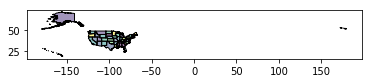

In [6]:
states.plot(scheme='quantiles')

In [8]:
powerplants = pd.read_csv('powerplants.csv')
powerplants.head()

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,...,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,...,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300
2,4,Walter Bouldin Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,750 Bouldin Dam Road,hydroelectric,...,0.0,0.0,NaN,NaN,Hydroelectric = 225.9 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.583889,-86.283056
3,7,Gadsden,Alabama Power Co,195,Electric Utility,Gadsden,Etowah,35903,1000 Goodyear Ave,natural gas,...,0.0,0.0,NaN,NaN,Natural Gas = 130 MW,Natural Gas Steam Turbine,"EIA-860, EIA-860M and EIA-923",201607,34.012800,-85.970800
4,8,Gorgas,Alabama Power Co,195,Electric Utility,Parrish,Walker,35580,460 Gorgas Road,coal,...,0.0,0.0,NaN,NaN,Coal = 1034 MW,Conventional Steam Coal,"EIA-860, EIA-860M and EIA-923",201607,33.644344,-87.196486


In [9]:
def make_point(row):
    return Point(row.Longitude, row.Latitude)
points = powerplants.apply(make_point, axis=1)
powerplants = gpd.GeoDataFrame(powerplants, geometry=points)
powerplants.crs = {'init': 'epsg:5071'}
powerplants.head()

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,...,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665)
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,...,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (-88.0103 31.0069)
2,4,Walter Bouldin Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,750 Bouldin Dam Road,hydroelectric,...,0.0,NaN,NaN,Hydroelectric = 225.9 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.583889,-86.283056,POINT (-86.283056 32.583889)
3,7,Gadsden,Alabama Power Co,195,Electric Utility,Gadsden,Etowah,35903,1000 Goodyear Ave,natural gas,...,0.0,NaN,NaN,Natural Gas = 130 MW,Natural Gas Steam Turbine,"EIA-860, EIA-860M and EIA-923",201607,34.012800,-85.970800,POINT (-85.9708 34.0128)
4,8,Gorgas,Alabama Power Co,195,Electric Utility,Parrish,Walker,35580,460 Gorgas Road,coal,...,0.0,NaN,NaN,Coal = 1034 MW,Conventional Steam Coal,"EIA-860, EIA-860M and EIA-923",201607,33.644344,-87.196486,POINT (-87.19648599999999 33.644344)


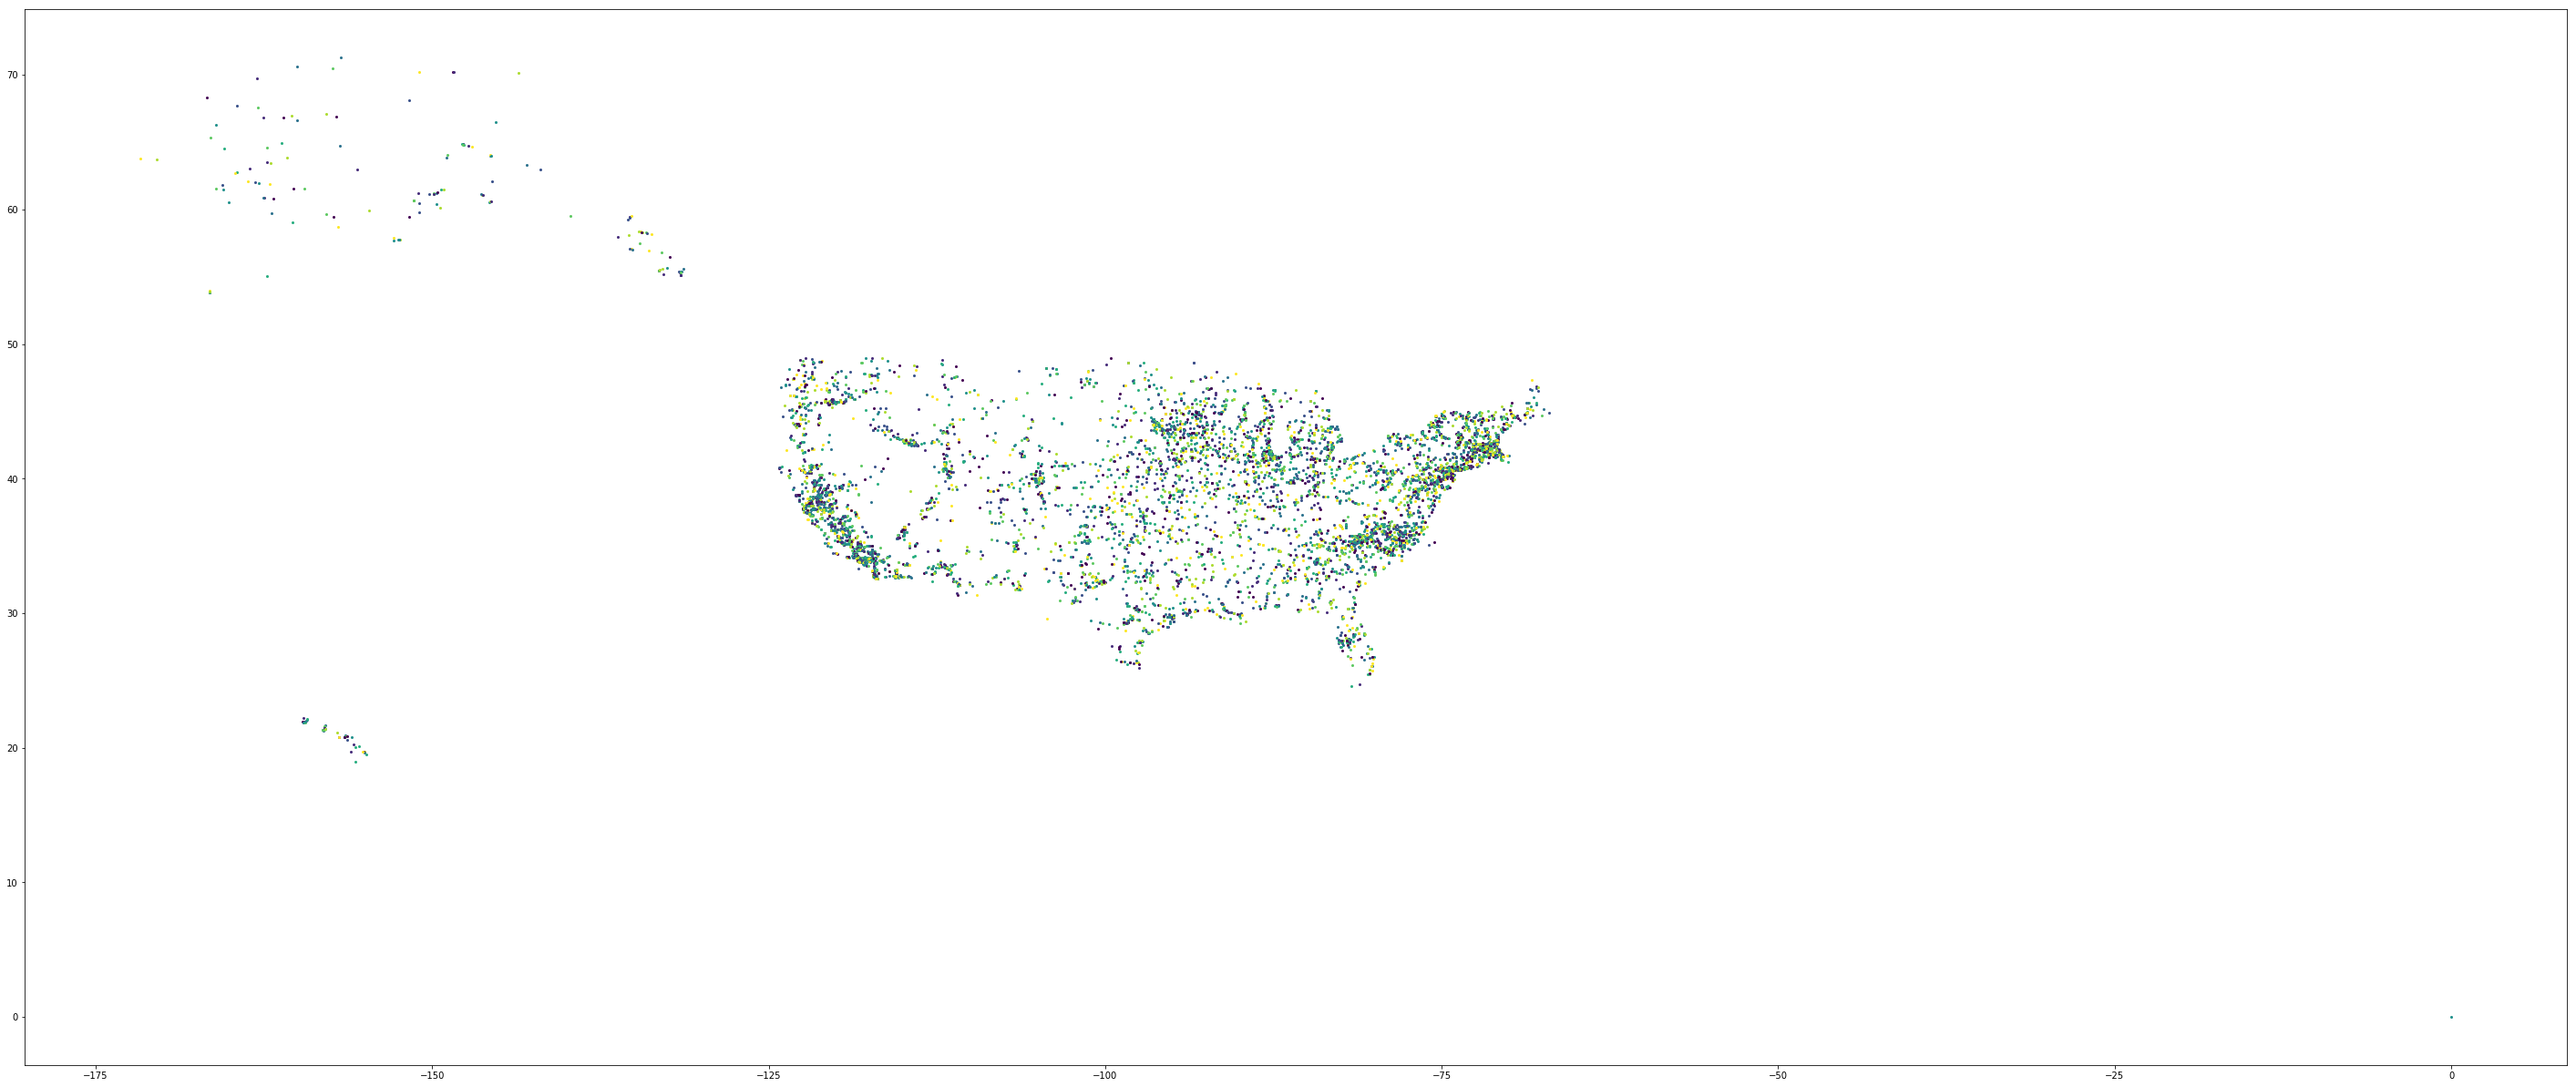

In [12]:
powerplants.plot(figsize=(50,50))

In [31]:
states.crs

{'init': 'epsg:5071'}

In [32]:
powerplants.crs

{'init': 'epsg:5071'}

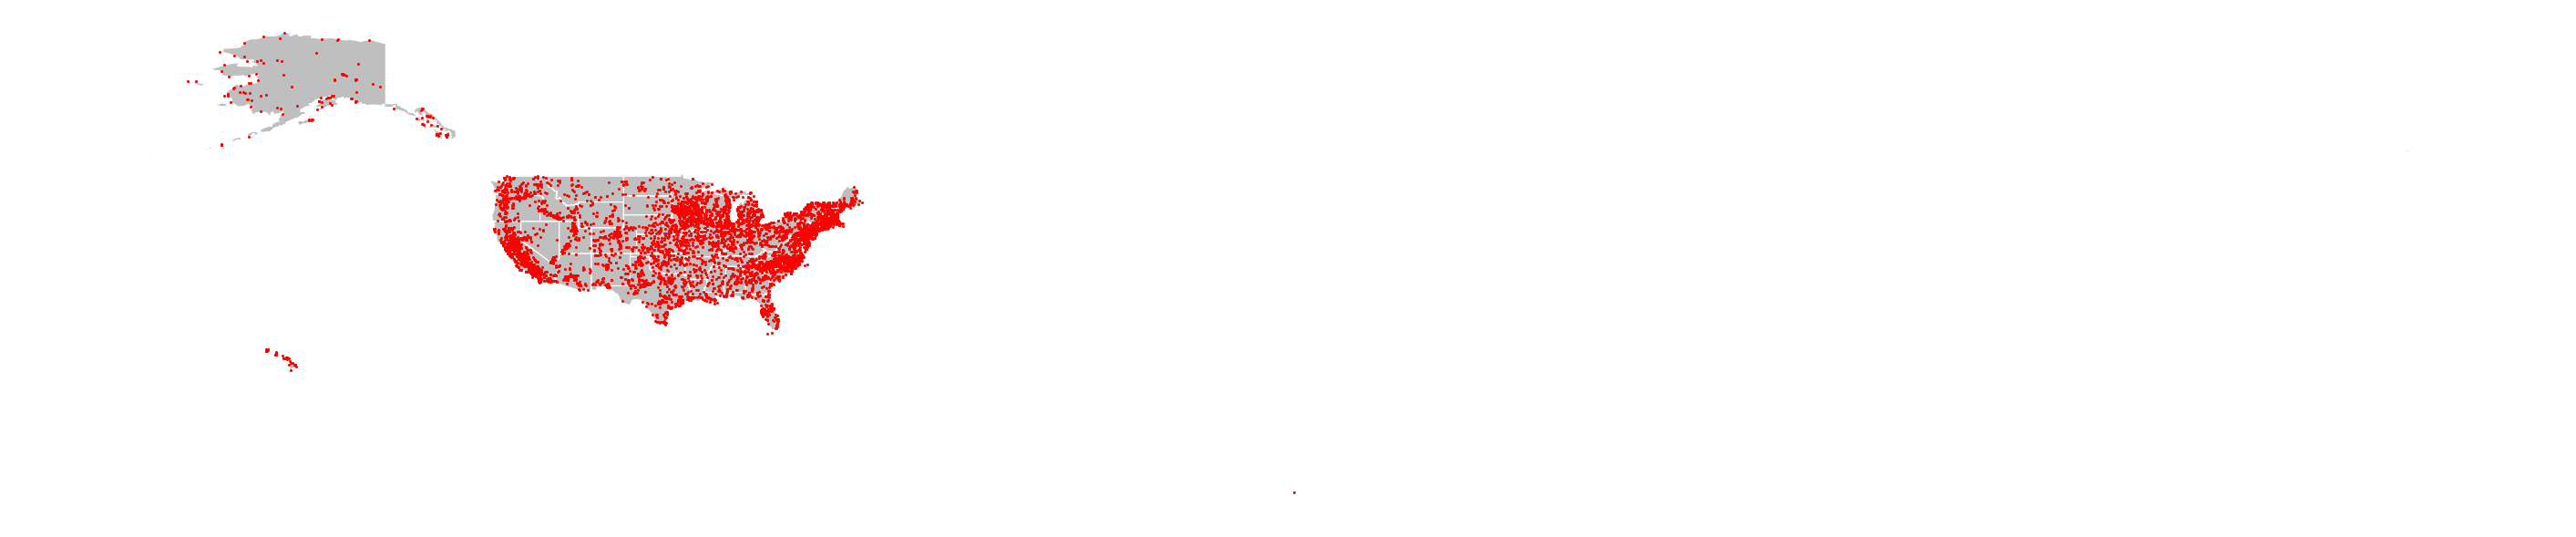

In [14]:
#Map of US powerplants by type 
ax = states.plot(figsize=(50,50), color='grey', edgecolor='white')
powerplants.plot(markersize=2, ax=ax, color='red', column='PrimSource') 
ax.axis('off') 
ax.set_xlim = ([-130, -60])
ax.set_ylim = ([25,50]) 

In [ ]:
#2) Make a map of air quality stations, color coded by average air quality 

In [28]:
air_quality = pd.read_csv('pm25_annual_fixed.csv')
air_quality.head() 

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,8.0,5.7,3.8,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-05-18
1,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR,...,12.4,8.7,2.9,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2017-05-18
2,1,33,1002,88101,1,34.762619,-87.638097,NAD83,PM2.5 - Local Conditions,24 HOUR,...,10.0,7.1,3.5,MUSCLE SHOALS,WILSON DAM RD AND 2ND ST.,Alabama,Colbert,Muscle Shoals,"Florence-Muscle Shoals, AL",2017-05-18
3,1,49,1003,88101,1,34.288567,-85.969858,NAD83,PM2.5 - Local Conditions,24 HOUR,...,9.6,8.2,4.2,CROSSVILLE,"13112 HWY.68 , CROSSVILLE AL. 35962",Alabama,DeKalb,Crossville,"Fort Payne, AL",2017-05-19
4,1,55,10,88101,1,33.991494,-85.992647,NAD83,PM2.5 - Local Conditions,24 HOUR,...,11.9,8.2,3.9,GADSDEN C. COLLEGE,"1001 WALLACE DRIVE, GADSDEN, AL 35902",Alabama,Etowah,Gadsden,"Gadsden, AL",2017-05-18


In [29]:
def make_point(row):
    return Point(row.Longitude, row.Latitude)
points = air_quality.apply(make_point, axis=1)
air_quality = gpd.GeoDataFrame(air_quality, geometry=points)
air_quality.crs = {'init': 'epsg:5071'}
air_quality.head() 

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,geometry
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,5.7,3.8,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-05-18,POINT (-87.880258 30.497478)
1,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR,...,8.7,2.9,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2017-05-18,POINT (-85.803608 33.284928)
2,1,33,1002,88101,1,34.762619,-87.638097,NAD83,PM2.5 - Local Conditions,24 HOUR,...,7.1,3.5,MUSCLE SHOALS,WILSON DAM RD AND 2ND ST.,Alabama,Colbert,Muscle Shoals,"Florence-Muscle Shoals, AL",2017-05-18,POINT (-87.638097 34.762619)
3,1,49,1003,88101,1,34.288567,-85.969858,NAD83,PM2.5 - Local Conditions,24 HOUR,...,8.2,4.2,CROSSVILLE,"13112 HWY.68 , CROSSVILLE AL. 35962",Alabama,DeKalb,Crossville,"Fort Payne, AL",2017-05-19,POINT (-85.969858 34.288567)
4,1,55,10,88101,1,33.991494,-85.992647,NAD83,PM2.5 - Local Conditions,24 HOUR,...,8.2,3.9,GADSDEN C. COLLEGE,"1001 WALLACE DRIVE, GADSDEN, AL 35902",Alabama,Etowah,Gadsden,"Gadsden, AL",2017-05-18,POINT (-85.99264699999998 33.991494)


(-197.09527795, 197.72483894999999, 16.287620949999997, 73.987902050000002)

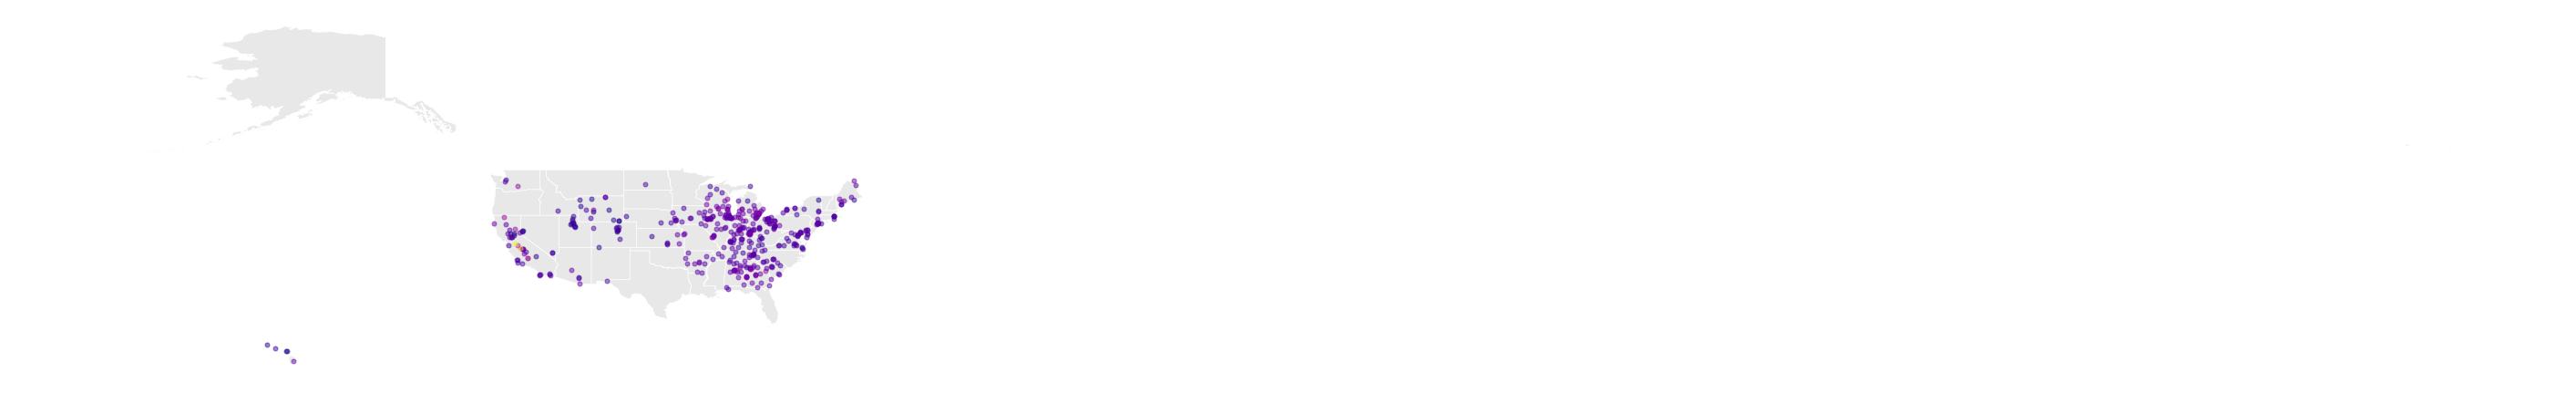

In [30]:
ax = states.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(50,20))
air_quality.plot(markersize=5, alpha=0.5, ax=ax, column='50th Percentile', cmap='plasma') 
ax.axis('off') 

In [ ]:
# Map all of the nuclear power plants in red, with the rest of the plants as dark grey.

In [ ]:
powerplants.columns

In [ ]:
powerplants['PrimSource'].value_counts() 

In [ ]:
df_nuclear = powerplants[powerplants['PrimSource'] == 'nuclear']
df_nuclear

In [ ]:
#This is mapping just the nuclear plants in the contiguous USA 
ax = states.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(70,70))
powerplants.plot(markersize=2, alpha=0.5, ax=ax, legend=True, color='grey')
df_nuclear.plot(markersize=3, ax=ax, legend=True, color='red') 
ax.axis('off') 

In [ ]:
#not_nuclear = powerplants[powerplants['PrimSource'] != 'nuclear']
#not_nuclear.head()


In [ ]:
# 3) Make a map of air quality stations, color coded by worst air quality ever  

In [ ]:
#air_quality.columns

In [ ]:
#4) Map the power plants owned by the top 5 most common energy companies as red. Map the rest of the plants as dark grey.

In [ ]:
powerplants.columns

In [ ]:
#so we get the company names with Utility_Na 

In [ ]:
powerplants['Utility_Na'].value_counts().head()

In [ ]:
#most_companies = powerplants[powerplants['Utility_Na'] == ['Pacific Gas & Electric Co', 'Erie Boulevard Hydropower LP']]  
#most_companies

In [ ]:
df_pacificorp = powerplants[powerplants['Utility_Na'] == 'PacifiCorp'] 

In [ ]:
df_socal = powerplants[powerplants['Utility_Na'] == 'Southern California Edison Co'] 

In [ ]:
df_sustainable = powerplants[powerplants['Utility_Na'] == 'Sustainable Power Group, LLC'] 

In [ ]:
df_erie = powerplants[powerplants['Utility_Na'] == 'Erie Boulevard Hydropower LP'] 

In [ ]:
df_pacific = powerplants[powerplants['Utility_Na'] == 'Pacific Gas & Electric Co']

In [ ]:
ax = states.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(30,30))
powerplants.plot(markersize=2, ax=ax, color='grey')
df_pacificorp.plot(markersize=3, ax=ax, color='red') 
df_socal.plot(markersize=3, ax=ax,color='red') 
df_sustainable.plot(markersize=3, ax=ax, color='red') 
df_erie.plot(markersize=3, ax=ax, color='red') 
df_pacific.plot(markersize=3, ax=ax, color='red') 

ax.axis('off') 

In [ ]:
#another, faster way to do the above 

In [ ]:
companies = ['Pacific Gas & Electric Co', 'Erie Boulevard Hydropower LP', 'Sustainable Power Group, LLC', 'Southern California Edison Co', 'PacifiCorp']
new_companies = powerplants[powerplants['Utility_Na'].isin(companies)]
new_companies

In [ ]:
ax = states.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(30,5))
powerplants.plot(markersize=2, alpha=0.5, ax=ax, color='grey')
new_companies.plot(markersize=3, ax=ax, color='red') 

In [ ]:
#  6) Map power plants that produce energy through both natural gas and oil.

In [ ]:
pd.set_option('display.max_columns', 29)
powerplants.head(100)

# GROUP TWO: For most of these you'll need a spatial join

Which power plants are in New York?

Which state produces the most energy from coal?

Map states with nuclear power plants in red, and states without in grey. Do the same thing for solar.

Make a map of total wind (or solar or coal) energy produced by each state, with little being a light color and high emissions being a brighter/darker color.

Make a map of worst air quality measured in each state, with high quality being light red and low quality being dark red

Which states have the most renewable plants, as a % of total plants? (include hydro, wind, solar)

In [ ]:
states.head()

In [ ]:
powerplants.head()

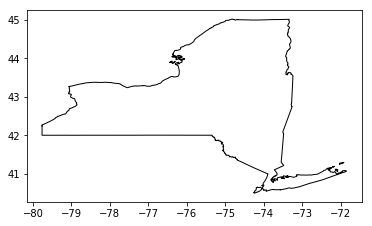

In [12]:
new_states = states[states['NAME'] == 'New York'] 
new_states.plot(color='white')

In [13]:
plants_with_states = gpd.sjoin(powerplants, states, how='inner', op='within')
plants_with_states.head(25)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,index_right,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,...,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,...,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
2,4,Walter Bouldin Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,750 Bouldin Dam Road,hydroelectric,...,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
3,7,Gadsden,Alabama Power Co,195,Electric Utility,Gadsden,Etowah,35903,1000 Goodyear Ave,natural gas,...,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
4,8,Gorgas,Alabama Power Co,195,Electric Utility,Parrish,Walker,35580,460 Gorgas Road,coal,...,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
6,10,Greene County,Alabama Power Co,195,Electric Utility,Demopolis,Greene,36732,Highway 43,natural gas,...,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
7,11,H Neely Henry Dam,Alabama Power Co,195,Electric Utility,Ohatchee,Calhoun,36271,1021 Ala Highway 144,hydroelectric,...,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
8,12,Holt Dam,Alabama Power Co,195,Electric Utility,Tuscaloosa,Tuscaloosa,35476,12117 Power Plant Road,hydroelectric,...,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
9,13,Jordan Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,6150Jordan Dam Lane,hydroelectric,...,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
10,14,Logan Martin Dam,Alabama Power Co,195,Electric Utility,Vincent,Talladega,35178,299 Logan Martin Road,hydroelectric,...,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL


In [14]:
plants_with_states['NAME'].value_counts().head()

California        1222
North Carolina     461
Texas              396
New York           372
Minnesota          274
Name: NAME, dtype: int64

In [15]:
#Which state produces the most energy from coal?

coal_plants = plants_with_states[plants_with_states['PrimSource'] == 'coal']
coal_plants['NAME'].value_counts().head(1)

Pennsylvania    24
Name: NAME, dtype: int64

In [16]:
# Map states with nuclear power plants in red, and states without in grey. Do the same thing for solar.
 

In [17]:
nuclear_plant_states = plants_with_states[plants_with_states['PrimSource'] == 'nuclear']

(-197.09527795, 197.72483894999999, 16.287620949999997, 73.987902050000002)

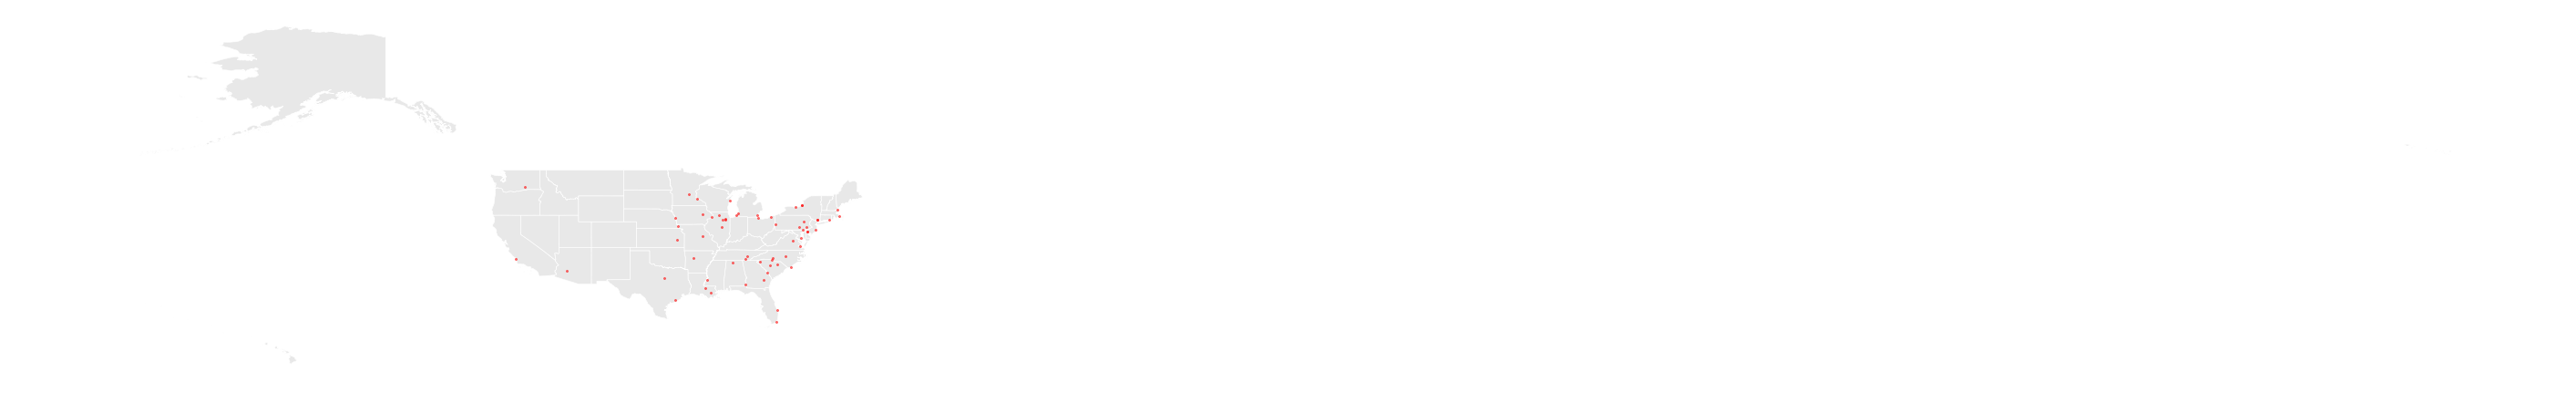

In [18]:
ax = states.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(50,50))
nuclear_plant_states.plot(markersize=2, alpha=0.5, ax=ax, color='red')
ax.axis('off')

In [19]:
solar_plant_states = plants_with_states[plants_with_states['PrimSource'] == 'solar']
solar_plant_states

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,index_right,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS
5285,57197,Blue Wing Solar Energy Generation,TX Solar I LLC,56565,IPP Non-CHP,San Antonio,Bexar,78223,10810 S Blue Wind Rd.,solar,...,49,0400000US48,676633459408,19025991684,48,00,Texas,48,01779801,TX
5679,57699,Webberville Solar Project,FRV AE Solar LLC,57021,IPP Non-CHP,Manor,Travis,78653,18580 FM 969,solar,...,49,0400000US48,676633459408,19025991684,48,00,Texas,48,01779801,TX
5946,58009,SunE CPS3 LLC,SunE CPS3 LLC,57386,IPP Non-CHP,Somerset,Bexar,78069,8719 S FM 2790,solar,...,49,0400000US48,676633459408,19025991684,48,00,Texas,48,01779801,TX
5950,58013,IKEA Round Rock 027,IKEA Property Inc,57389,Commercial Non-CHP,Round Rock,Williamson,78664,1 IKEA Way,solar,...,49,0400000US48,676633459408,19025991684,48,00,Texas,48,01779801,TX
5964,58027,SunE CPS2 LLC,SunE CPS2 LLC,57403,IPP Non-CHP,San Antonio,Bexar,78221,3580 Valley Rd,solar,...,49,0400000US48,676633459408,19025991684,48,00,Texas,48,01779801,TX
5998,58068,SunE CPS1 LLC,SunE CPS1 LLC,57419,IPP Non-CHP,San Antonio,Bexar,78221,4000 Rabel Road,solar,...,49,0400000US48,676633459408,19025991684,48,00,Texas,48,01779801,TX
6371,58488,"Bryan Solar, LLC","NVT LICENSES, LLC",58473,IPP Non-CHP,Presidio,Presidio,79845,3400 Rancho Rd,solar,...,49,0400000US48,676633459408,19025991684,48,00,Texas,48,01779801,TX
6418,58537,OCI Alamo Solar I,OCI Solar Power,58489,IPP Non-CHP,San Antonio,Bexar,78204,14984 South Blue Wing Road,solar,...,49,0400000US48,676633459408,19025991684,48,00,Texas,48,01779801,TX
6567,58710,Barilla Solar,First Solar Asset Management,59745,IPP Non-CHP,Fort Stockton,Pecos,79735,Hovey Road,solar,...,49,0400000US48,676633459408,19025991684,48,00,Texas,48,01779801,TX
6572,58716,"OCI Alamo 2, LLC",OCI Solar Power,58489,IPP Non-CHP,Converse,Bexar,78109,8203 Binz Engelman Road,solar,...,49,0400000US48,676633459408,19025991684,48,00,Texas,48,01779801,TX


(-197.09527795, 197.72483894999999, 16.287620949999997, 73.987902050000002)

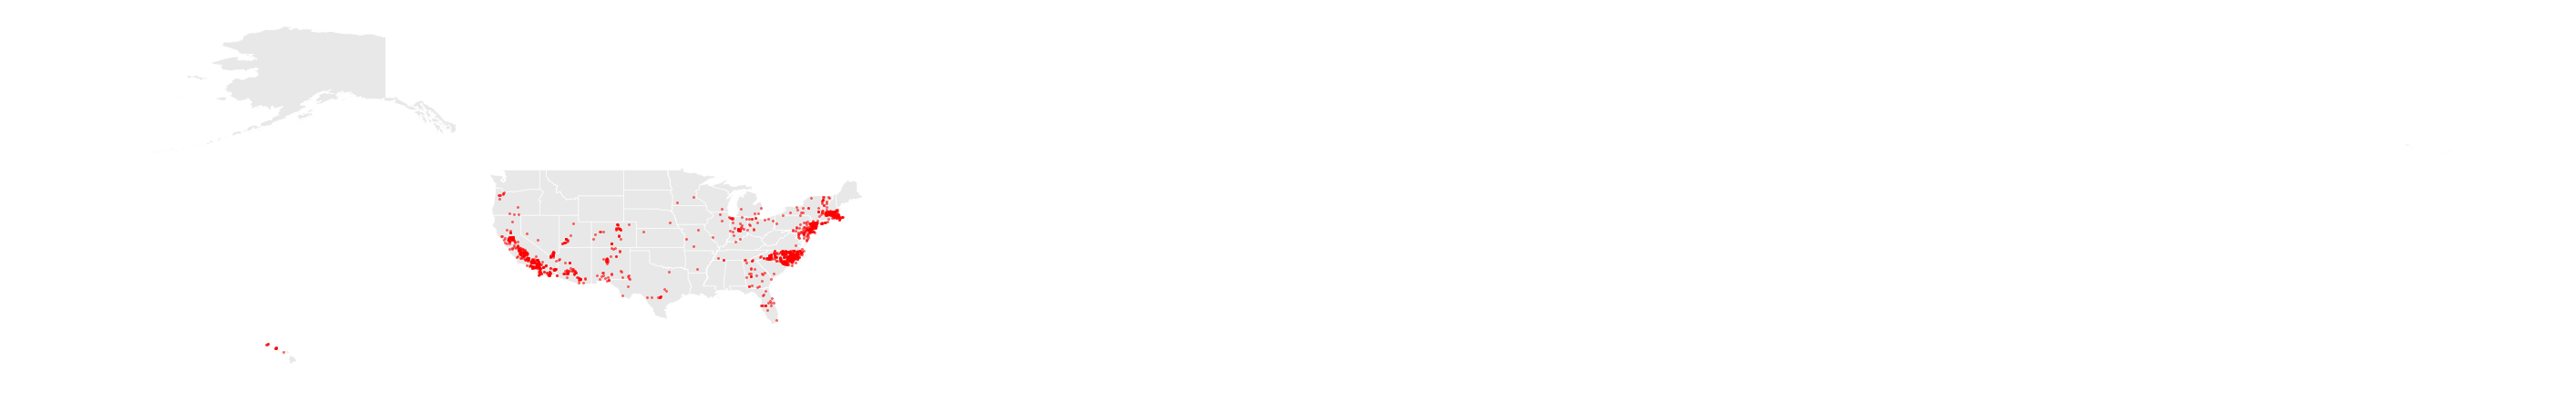

In [20]:
ax = states.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(50,50))
solar_plant_states.plot(markersize=2, alpha=0.5, ax=ax, color='red')
ax.axis('off') 

In [21]:
# Make a map of total wind (or solar or coal) energy produced by each state, 
#with little being a light color and high emissions being a brighter/darker color.

In [22]:
df_wind = powerplants[powerplants['PrimSource'] == 'wind']

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df_wind_new = df_wind.sort_values(by = 'Wind_MW', ascending=False)
df_wind_new

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
4579,56291,Horse Hollow Wind Energy Center,FPL Energy Horse Hollow LLC,50063,IPP Non-CHP,Wingate,Taylor,79566,14064 B Hwy 277 S,wind,...,735.5,NaN,NaN,Wind = 735.5 MW,Onshore Wind Turbine,"EIA-860, EIA-860M and EIA-923",201607,32.214024,-100.057120,POINT (-100.05712 32.214024)
4931,56763,Capricorn Ridge Wind LLC,Capricorn Ridge Wind LLC,55958,IPP Non-CHP,Sterling City,Sterling,76951,"533 Bird Lane, P.O. Box 129",wind,...,662.5,NaN,NaN,Wind = 662.5 MW,Onshore Wind Turbine,"EIA-860, EIA-860M and EIA-923",201607,31.926100,-100.928100,POINT (-100.9281 31.9261)
4942,56777,Fowler Ridge Wind Farm LLC,AE Power Services LLC,55963,IPP Non-CHP,Fowler,Benton,47944,91S 100 East,wind,...,600.3,NaN,NaN,Wind = 600.3 MW,Onshore Wind Turbine,"EIA-860, EIA-860M and EIA-923",201607,40.583889,-87.333600,POINT (-87.3336 40.583889)
5758,57787,Flat Ridge 2 Wind Energy LLC,AE Power Services LLC,55963,IPP Non-CHP,Nashville,Harper,67112,7299 NE Ridge Road,wind,...,470.4,NaN,NaN,Wind = 470.4 MW,Onshore Wind Turbine,"EIA-860, EIA-860M and EIA-923",201607,37.366509,-98.261077,POINT (-98.261077 37.366509)
6692,58883,Highland Wind Project (IA),MidAmerican Energy Co,12341,Electric Utility,Primghar,O'Brien,51245,3948 Starling Ave,wind,...,459.4,NaN,NaN,Wind = 459.4 MW,Onshore Wind Turbine,"EIA-860, EIA-860M and EIA-923",201607,43.080278,-95.656111,POINT (-95.656111 43.080278)
4732,56485,Biglow Canyon Wind Farm,Portland General Electric Co,15248,Electric Utility,Wasco,Sherman,97065,96900 Herin Lane,wind,...,449.7,NaN,NaN,Wind = 449.7 MW,Onshore Wind Turbine,"EIA-860, EIA-860M and EIA-923",201607,45.653745,-120.603414,POINT (-120.603414 45.653745)
5530,57501,Rolling Hills Wind Farm,MidAmerican Energy Co,12341,Electric Utility,Massena,Cass,50853,75121 Pella Road,wind,...,443.9,NaN,NaN,Wind = 443.9 MW,Onshore Wind Turbine,"EIA-860, EIA-860M and EIA-923",201607,41.197300,-94.774400,POINT (-94.7744 41.1973)
5920,57983,Stephens Ranch Wind Energy LLC,Stephens Ranch Wind Energy LLC,57355,IPP Non-CHP,O'Donnell,Borden,79351,2186 County Road 131,wind,...,376.0,NaN,NaN,Wind = 376 MW,Onshore Wind Turbine,"EIA-860, EIA-860M and EIA-923",201607,32.926389,-101.647778,POINT (-101.647778 32.926389)
5283,57195,Lower Snake River Wind Energy Project,Puget Sound Energy Inc,15500,Electric Utility,Pomeroy,GARFIELD,99347,39 Falling Springs Rd,wind,...,342.7,NaN,NaN,Wind = 342.7 MW,Onshore Wind Turbine,"EIA-860, EIA-860M and EIA-923",201607,46.524167,-117.821666,POINT (-117.821666 46.524167)
4578,56290,Maple Ridge Wind Farm,"Flat Rock Windpower, LLC",54684,IPP Non-CHP,Lowville,Lewis,13367,6972 Eagle Factory Road,wind,...,322.0,NaN,NaN,Wind = 322 MW,Onshore Wind Turbine,"EIA-860, EIA-860M and EIA-923",201607,43.785300,-75.575300,POINT (-75.5753 43.7853)


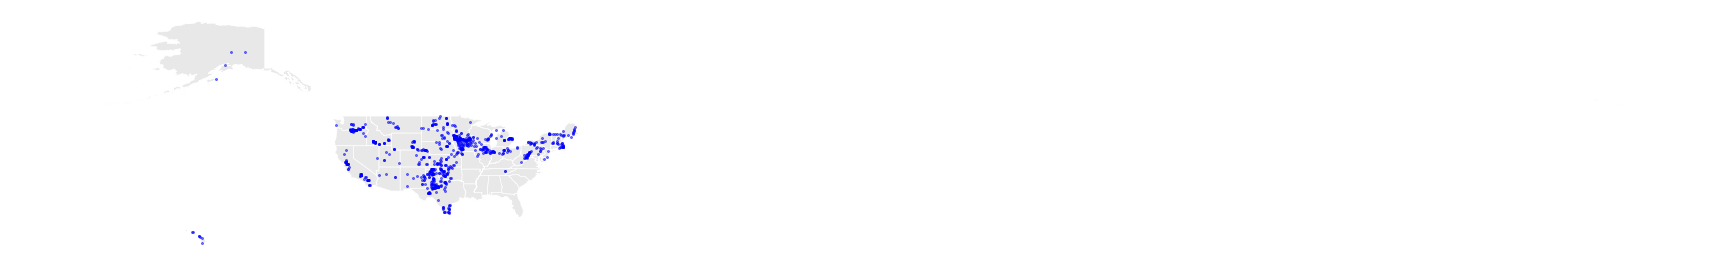

In [25]:
#alpha will show where things are densely populated 
ax = states.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(30,5))
df_wind_new.plot(markersize=2, alpha=0.5, ax=ax, color='blue')
ax.axis('off')
ax.set_xlim = ([-130, -50])
ax.set_ylim = ([25,50]) 

In [26]:
# Make a map of worst air quality measured in each state, with high quality being light red and low quality being dark red


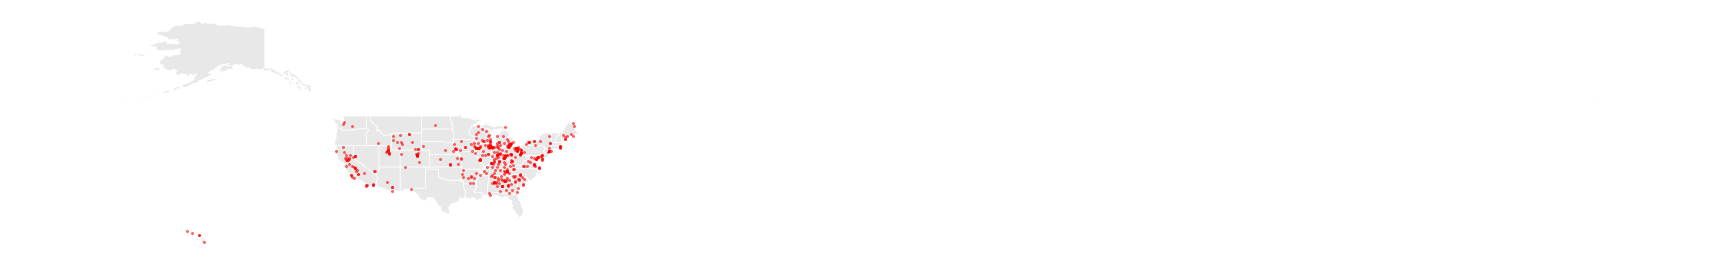

In [37]:
ax = states.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(30,30))
air_quality.plot(markersize=2, alpha=0.5, ax=ax, color='red', legend=False)
ax.axis('off') 
ax.set_xlim = ([-125, -60])
ax.set_ylim = ([25,40]) 